****Learning Activations in Neural Networks****

Iries dataset

In [ ]:
#importing the necessary python libraries
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'#for ploting graphs 

from sklearn.datasets import load_iris #importing the iris dataset
iris_data = load_iris()

In [4]:
print(iris_data['DESCR'])#priting iris dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

C:\Users\Rahul\AppData\Local\Temp\ipykernel_21456\2665450051.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=([0, 1, 2]))
C:\Users\Rahul\AppData\Local\Temp\ipykernel_21456\2665450051.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=([0, 1, 2]))


Text(0.5, 1.0, 'Petal Sample')

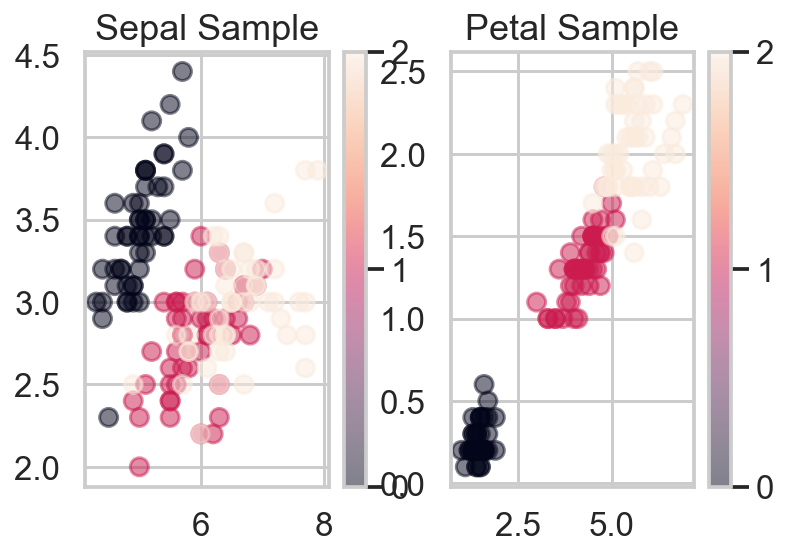

In [5]:
#viewing the range dataset values
n_samples, n_features = iris_data.data.shape

plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(iris_data.data[:,0], iris_data.data[:,1], alpha=0.5, 
                           c=iris_data.target) 
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Sepal Sample')

plt.subplot(1, 2, 2)
scatter_plot_2 = plt.scatter(iris_data.data[:,2], iris_data.data[:,3], alpha=0.5, 
                           c=iris_data.target)
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Petal Sample')

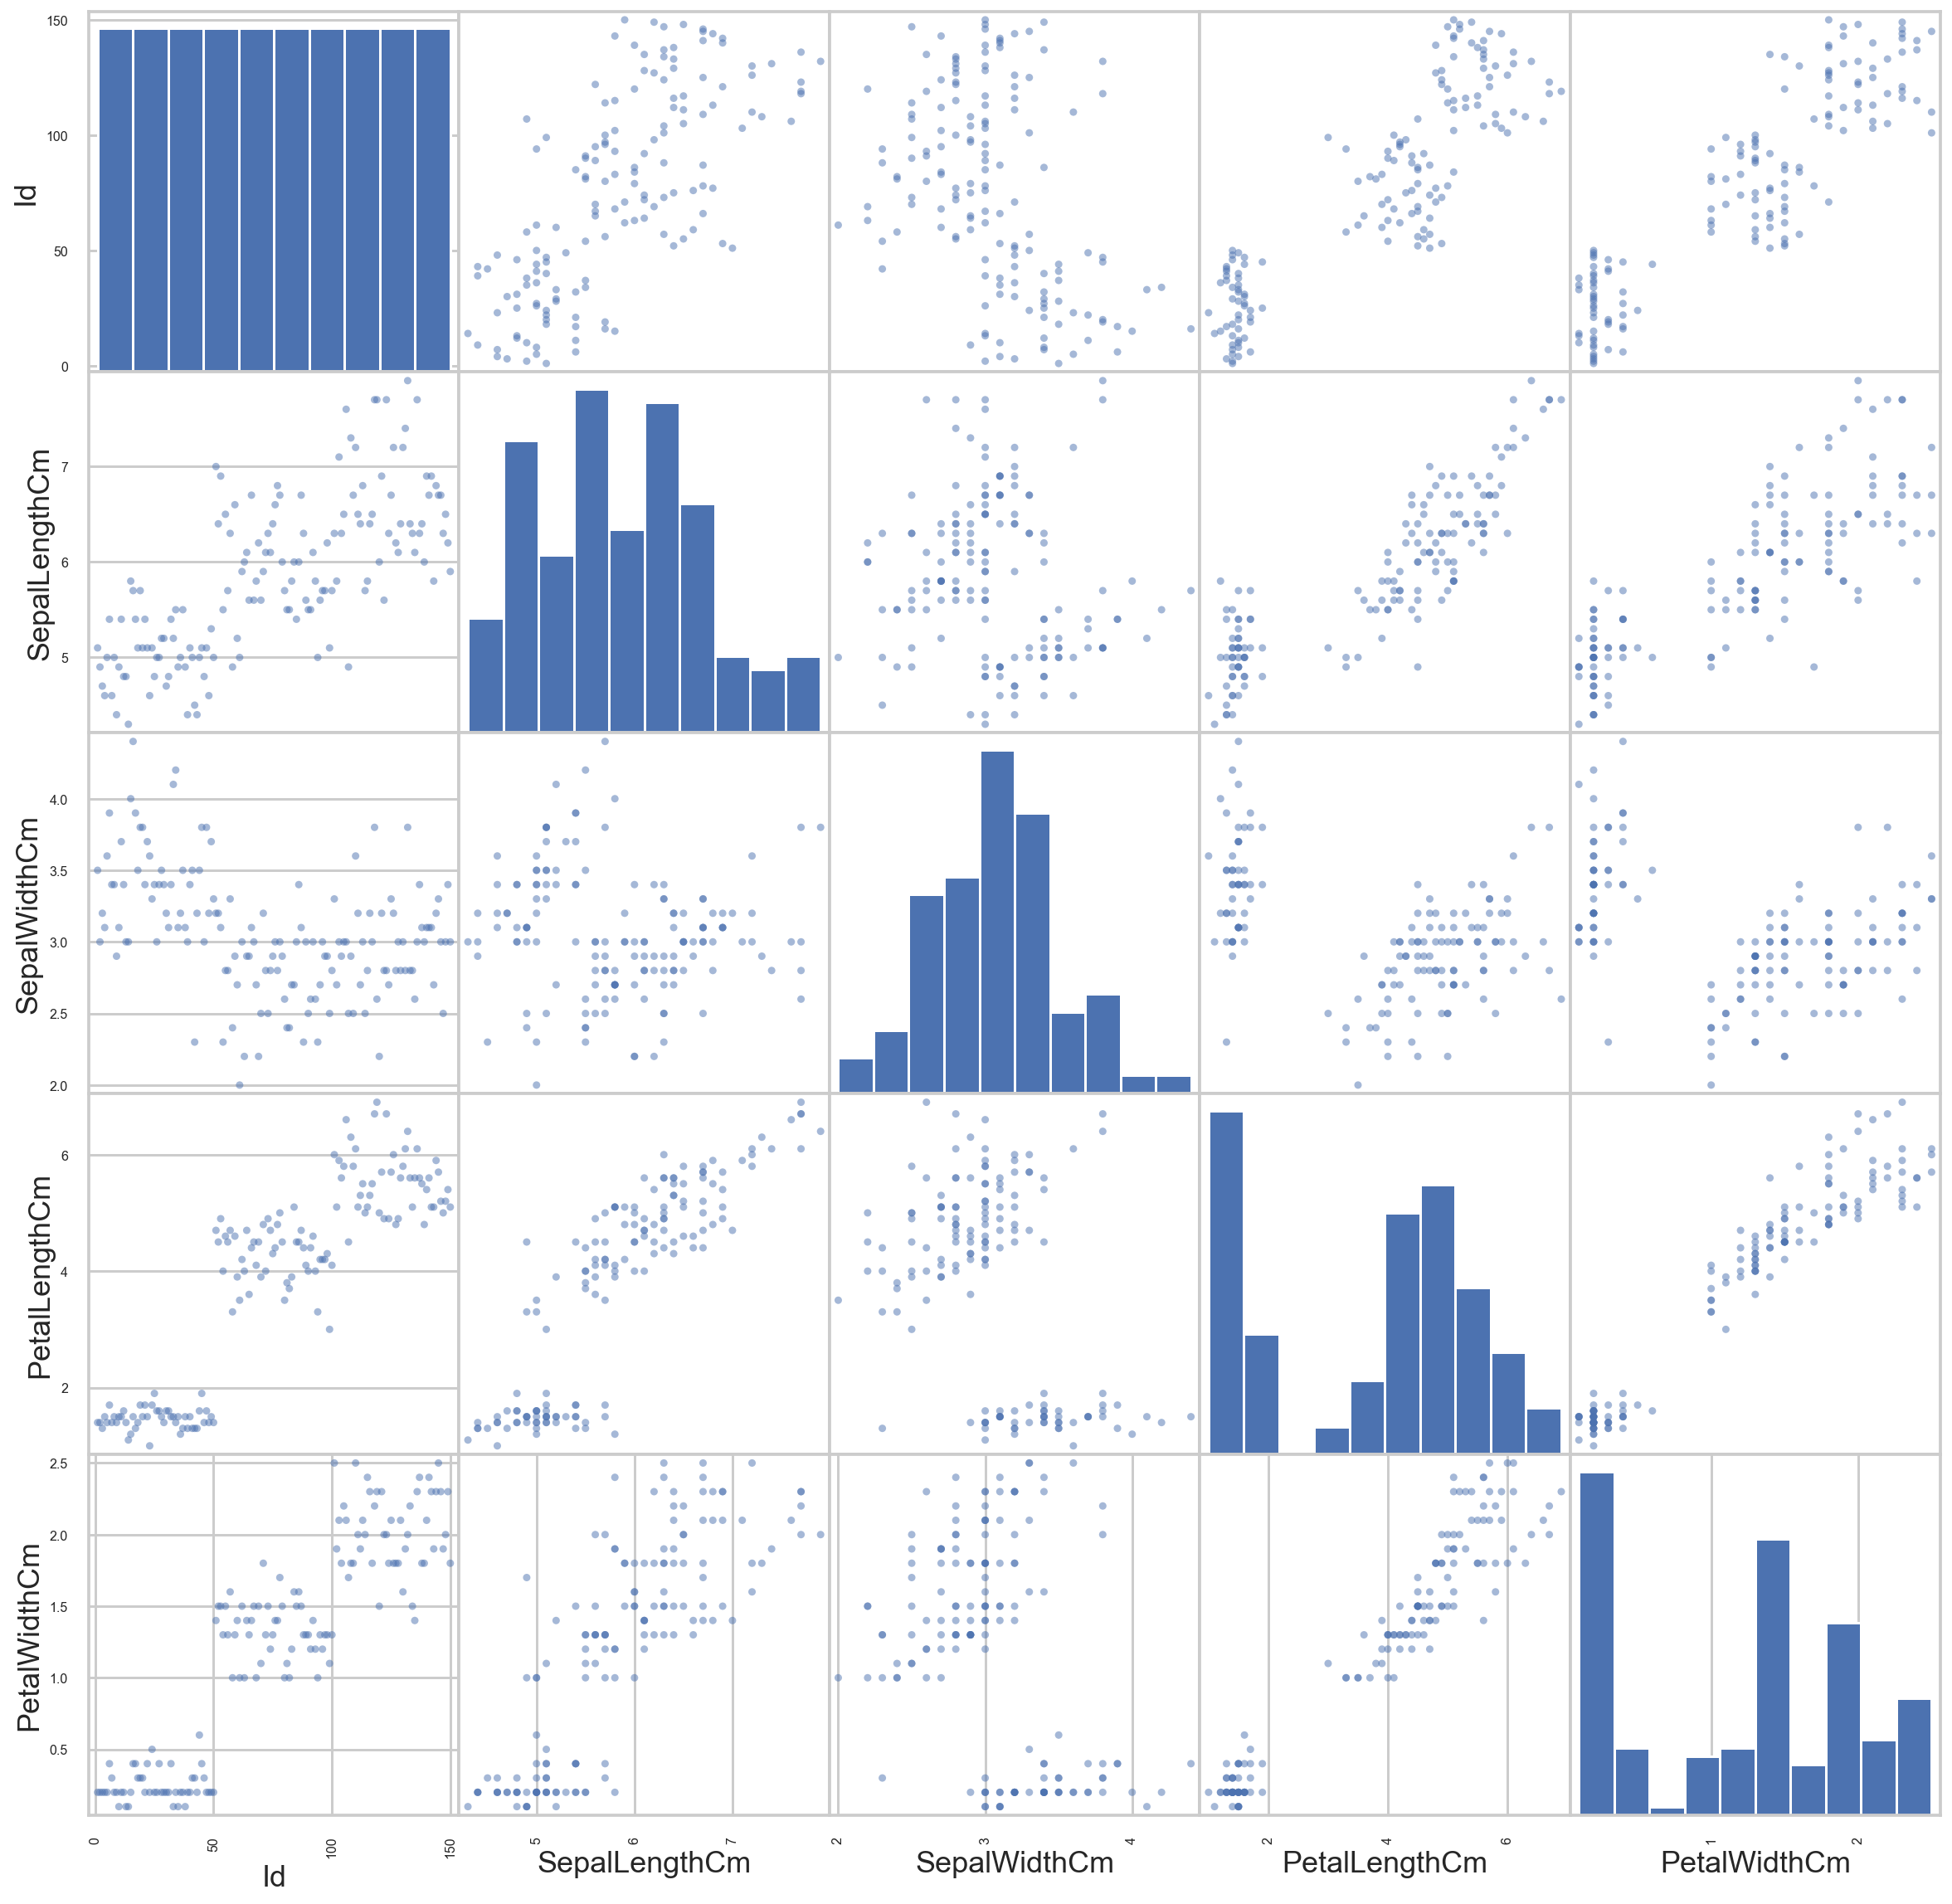

In [6]:
#importing the csv format of iris dataset and ploting the scatter plot of each variables with respect to another
import pandas
from pandas.plotting import scatter_matrix
dataset = pandas.read_csv('Iris.csv')
scatter_matrix(dataset, alpha=0.5, figsize=(20, 20))
plt.show()

In [7]:
#printing dataset
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
random.seed(144)#spliting the dataset observations

def separate_data():#seperating the observations manually
    A = iris_dataset[0:40]
    tA = iris_dataset[40:50]
    B = iris_dataset[50:90]
    tB = iris_dataset[90:100]
    C = iris_dataset[100:140]
    tC = iris_dataset[140:150]
    train = np.concatenate((A,B,C))#craeting training and testing variables
    test =  np.concatenate((tA,tB,tC))
    return train,test

In [9]:
train_percent = 80 # Percent Training 
test_percent = 20 # Percent Test
iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

Filetrain, Filetest = separate_data()
#creating training and testing dataset of both dependent and independent variabels
train_X = np.array([i[:4] for i in Filetrain])
train_y = np.array([i[4] for i in Filetrain])
test_X = np.array([i[:4] for i in Filetest])
test_y = np.array([i[4] for i in Filetest])

****Implementation the Multilayer Perceptron****

In [10]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random

In [11]:
#creating the class for diffrent define functions
class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        if (params == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 800                      # Epochs
            self.iasHiddenValue = -1                   # Bias Hidden Layer
            self.BiasOutputValue = -1                  # Bias Output Layer
            self.activation = self.ativacao['sigmoid'] # Initial Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
        
        #'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass

    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]
        #Checking the error by diffrent activation function
    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
    #checking the error and updates the weights
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        #'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        #'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
                
                
        #'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        #'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show() 
    def predict(self, X, y):
        #'Returns the predictions for every element of X'
        my_predictions = []
        #'Forward Propagation'
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
        
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0: 
                array_score.append([i, 'Iris-setosa', my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                 array_score.append([i, 'Iris-versicolour', my_predictions[i], y[i]])
            elif my_predictions[i] == 2:
                 array_score.append([i, 'Iris-virginica', my_predictions[i], y[i]])
                    
        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'Predicted', 'Actual'])
        return my_predictions, dataframe
    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                #'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                #'Stage 2 - One-Hot-Encoding for converting categorical variable to the numirical of target variable'
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 define manully to each class
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
                    #'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
            
            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)
        #plotting values of weights in each neuron of hidden layer
        plt.plot(W0[0])
        plt.title('Weight Hidden update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.ylabel('Value Weight')
        plt.show()
        #plotting values of weights in each neuron of output layer
        plt.plot(W1[0])
        plt.title('Weight Output update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()

        return self

****Finding the best parameters i.e Activation function****

For find the best parameters, it was necessary to realize various tests using different values to the parameters. The graphs below denote all tests made to select the best configuration for the multilayer perceptron. These tests were important in selecting the best settings and ensuring the best accuracy. The graph was drawn manually, but you can change the settings and note the results obtained. The tests involve different activation functions and the number of neurons for each layer.

In [12]:
#Checking the performance of each activation function
def show_test():
    ep1 = [0,100,200,300,400,500,600,700,800,900,1000,1500,2000]# for checking performance of activetion function w.r.t epochs
    h_5 = [0,60,70,70,83.3,93.3,96.7,86.7,86.7,76.7,73.3,66.7,66.7]
    h_4 = [0,40,70,63.3,66.7,70,70,70,70,66.7,66.7,43.3,33.3]
    h_3 = [0,46.7,76.7,80,76.7,76.7,76.6,73.3,73.3,73.3,73.3,76.7,76.7]
    plt.figure(figsize=(10,4))
    l1, = plt.plot(ep1, h_3, "--",color='b',label="node-3", marker=11)
    l2, = plt.plot(ep1, h_4, "--",color='g',label="node-4", marker=8)
    l3, = plt.plot(ep1, h_5, "--",color='r',label="node-5", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("number of Epochs")
    plt.ylabel("Performance by %")
    plt.title("Number of Hidden Layers - Performance")
    
    ep2 = [0,100,200,300,400,500,600,700]# for checking performance of activetion function w.r.t epochs
    tanh = [0.18,0.027,0.025,0.022,0.0068,0.0060,0.0057,0.00561]
    sigm = [0.185,0.0897,0.060,0.0396,0.0343,0.0314,0.0296,0.0281]
    Relu = [0.185,0.05141,0.05130,0.05127,0.05124,0.05123,0.05122,0.05121]
    plt.figure(figsize=(10,4))
    l1 , = plt.plot(ep2, tanh, "--",color='b',label="Hyperbolic Tangent",marker=11)
    l2 , = plt.plot(ep2, sigm, "--",color='g',label="Sigmoide", marker=8)
    l3 , = plt.plot(ep2, Relu, "--",color='r',label="ReLu", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("Activation Functions - Performance")
    
    fig, ax = plt.subplots()
    names = ["Hyperbolic Tangent","Sigmoide","ReLU"]
    x1 = [2.0,4.0,6.0]
    plt.bar(x1[0], 53.4,0.4,color='b')
    plt.bar(x1[1], 96.7,0.4,color='g')
    plt.bar(x1[2], 33.2,0.4,color='r')
    plt.xticks(x1,names)
    plt.ylabel('Performance by %')
    plt.title('Performance - Activation Functions')
    plt.show()

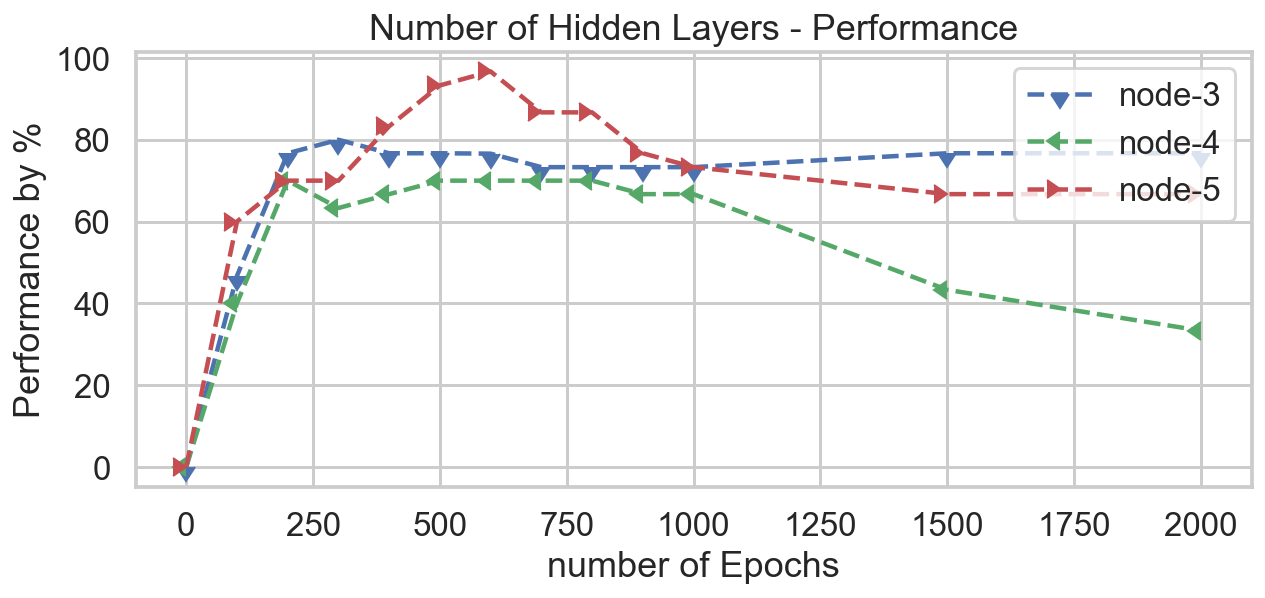

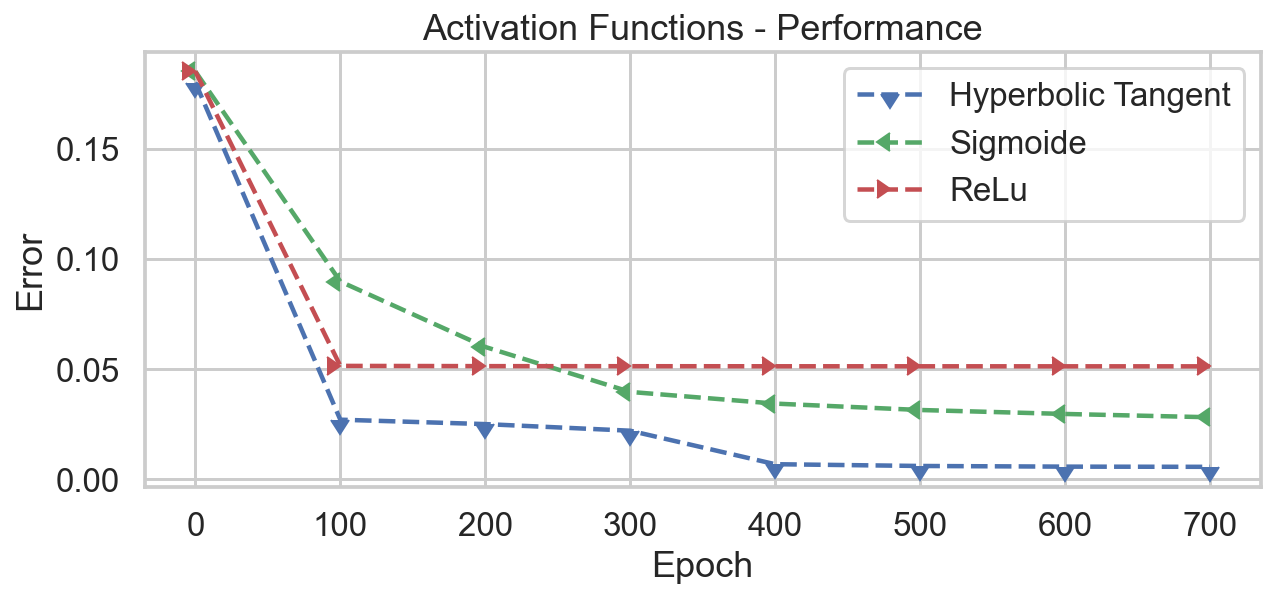

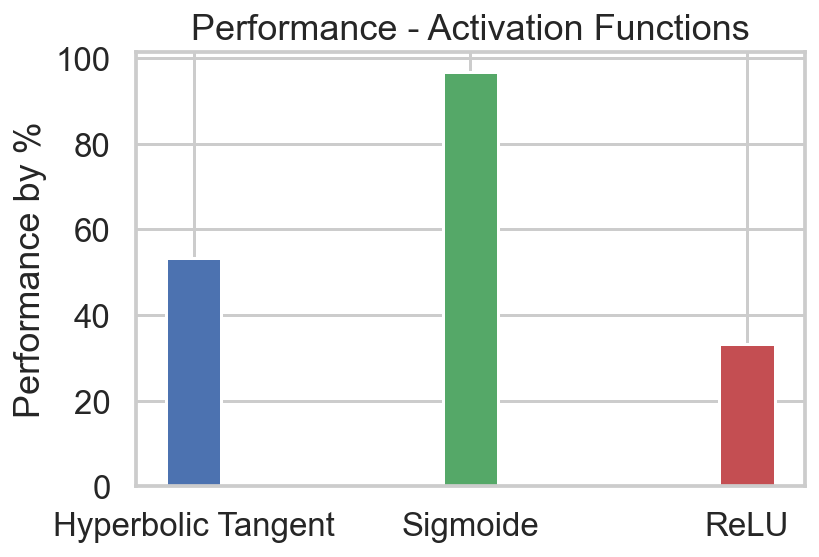

In [13]:
show_test()

****Sigmoid activation function gives best overall performance****

****Training the Artificial Neural Network****

In [14]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':800, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}#defining the parameters for training

Epoch  1 - Total Error:  0.09201362613562472
Epoch  50 - Total Error:  0.03858730608343592
Epoch  100 - Total Error:  0.03171289615148211
Epoch  150 - Total Error:  0.02929907452819133
Epoch  200 - Total Error:  0.027924568936175346
Epoch  250 - Total Error:  0.026807385929112016
Epoch  300 - Total Error:  0.025673197686522202
Epoch  350 - Total Error:  0.024382789626458966
Epoch  400 - Total Error:  0.022899953220569376
Epoch  450 - Total Error:  0.021283974094914893
Epoch  500 - Total Error:  0.019627506207290847
Epoch  550 - Total Error:  0.01802180401414675
Epoch  600 - Total Error:  0.01653765996772971
Epoch  650 - Total Error:  0.015216341127861386
Epoch  700 - Total Error:  0.01407135650886074
Epoch  750 - Total Error:  0.013096382235135614
Epoch  800 - Total Error:  0.012274136888808186


C:\Users\Rahul\AppData\Local\Temp\ipykernel_21456\1114252021.py:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


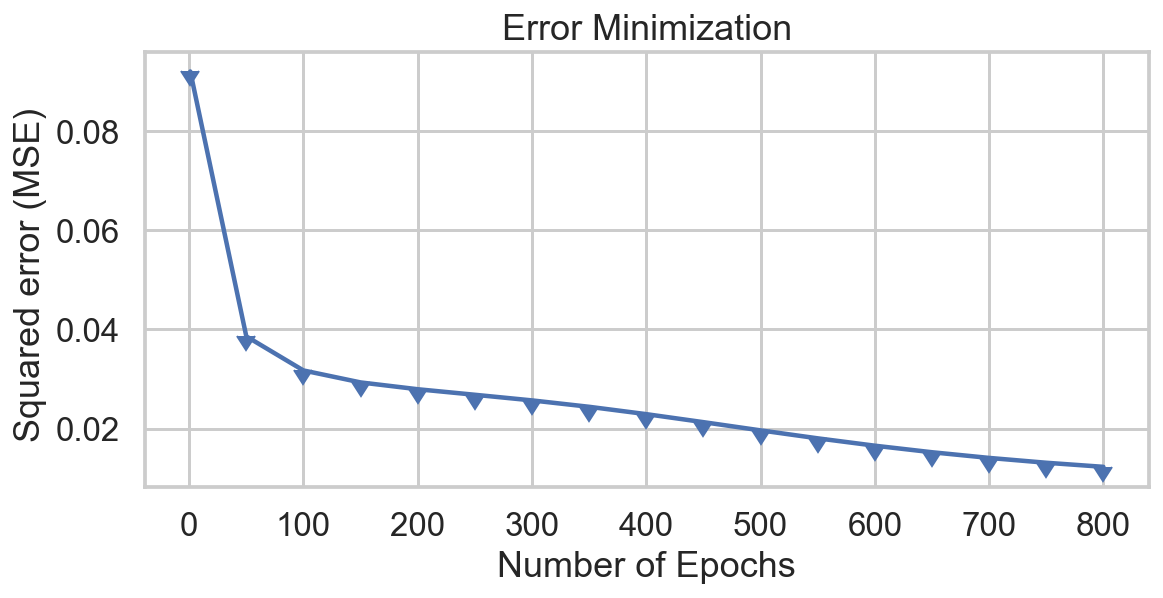

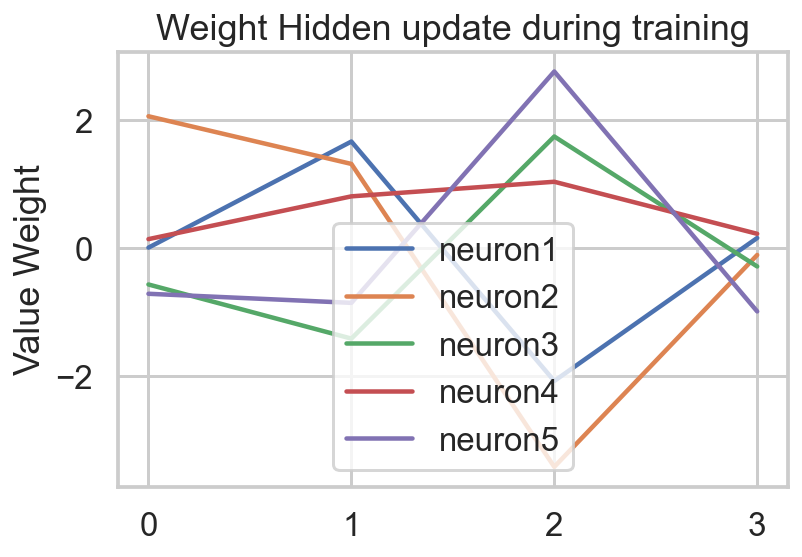

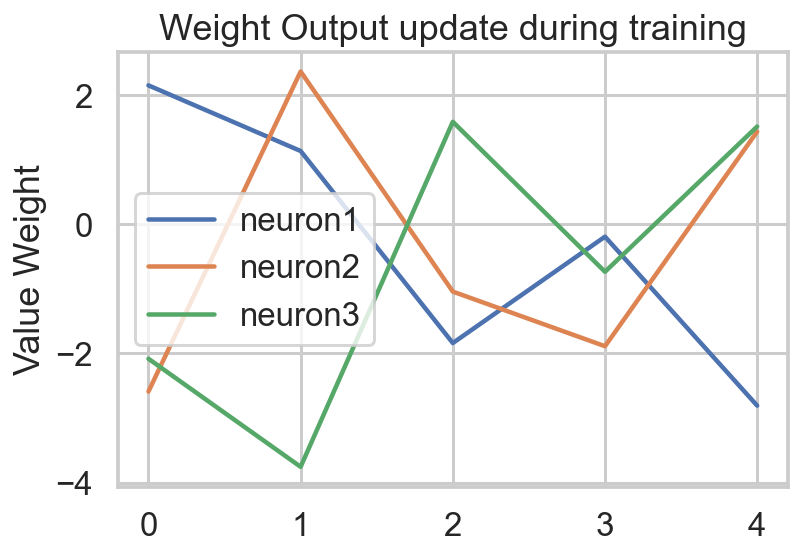

AttributeError: 'MultiLayerPerceptron' object has no attribute 'OutputLayer'

In [15]:
#fitting model
Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)
MultiLayerPerceptron(params=None)

****Step 2: testing our results****

In [30]:
prev, dataframe = Perceptron.predict(test_X, test_y)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1
        
for i in range(len(test_y)):
    if test_y[i] == prev[i]: 
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1    
         
hits = (hits / len(test_y)) * 100
faults = 100 - hits

following dataframe shows actual values of target and predicted values of target

In [17]:
dataframe

,_id,class,Predicted,Actual
0,0,Iris-setosa,0,0.0
1,1,Iris-setosa,0,0.0
2,2,Iris-versicolour,1,1.0
3,3,Iris-virginica,2,1.0
4,4,Iris-virginica,2,2.0
5,5,Iris-virginica,2,2.0
6,6,Iris-virginica,2,2.0
7,7,Iris-virginica,2,2.0
8,8,Iris-virginica,2,1.0
9,9,Iris-setosa,0,0.0


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [19]:
contingency_matrix = pd.crosstab(dataframe['Predicted'], dataframe['Actual'])

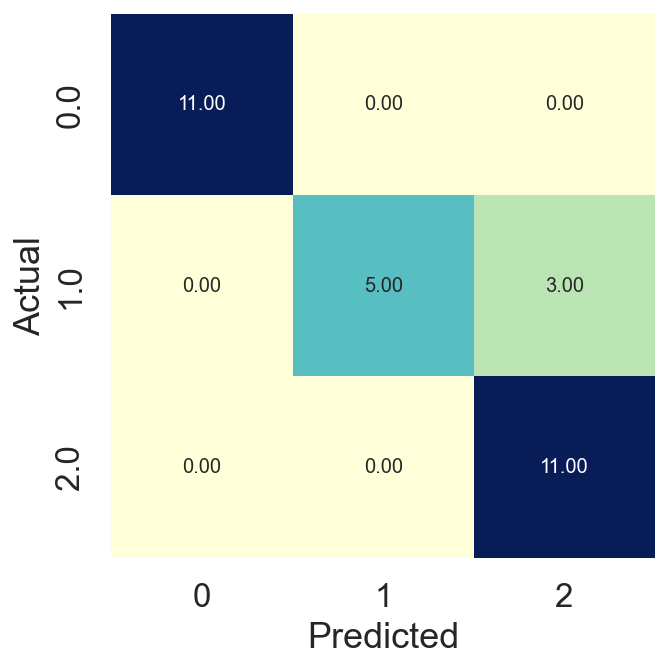

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
fig = plt.figure(figsize= (20,5))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sn.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.show()

Confusion matrix shoes the values of true positives, true negatives, false positives, and false negatives.

****Classification report of testing****

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(dataframe['Actual'], dataframe['Predicted']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.62      0.77         8
         2.0       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.88        30
weighted avg       0.92      0.90      0.89        30



****Step 3. Accuracy and precision the Multilayer Perceptron****

In [35]:
#it showing the percentage of correct prediction and incorrect prediction and no of samples of each class
graph_hits = []
print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",n_samples)
print("*Iris-Setosa:",n_set,"samples")
print("*Iris-Versicolour:",n_vers,"samples")
print("*Iris-Virginica:",n_virg,"samples")



Porcents : 90.00 % hits and 10.00 % faults
Total samples of test 150
*Iris-Setosa: 11 samples
*Iris-Versicolour: 8 samples
*Iris-Virginica: 11 samples


****Step 4. Score for each one of the samples****

plotting the accuracy of each target class

In [34]:

acc_set = (score_set/n_set)*100
acc_vers = (score_vers/n_vers)*100
acc_virg = (score_virg/n_virg)*100
print("- Acurracy Iris-Setosa:","%.2f"%acc_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%acc_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%acc_virg, "%")


- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 62.50 %
- Acurracy Iris-Virginica: 100.00 %
